# Packages

## poetry installs
In order to run this notebook, you must *beforehand* install dependencies with [poetry](https://python-poetry.org).

If you don't have `poetry` on your machine:
* [Install](https://python-poetry.org/docs/#installation) it, or
* Manually install the packages at the correct version with pip

If for some reason something fails, good luck.

## pip installs

The notebook will then install some packages on its own with pip (because of course nothing works simply).

In [1]:
# gym 21 won't install with poetry for some reason.... dependency management in python is such a hell really!
%pip install --upgrade setuptools==65.5.0
%pip install gym==0.21.0


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## External imports

In [2]:
import random

import gym
import numpy as np
import torch
from pyvirtualdisplay import Display

## Internal imports

In [3]:
from utils import RainbowAgent, show_latest_video

In [4]:
# Start virtual display, preventing it to pop-up
dis = Display(visible=0, size=(400, 400))
dis.start()

# Environment

The [code](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py) and [configurations](https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L53) of CartPole-v1 are in OpenAI's repository.

In [5]:
# environment
env_id = "CartPole-v1"
env = gym.make(env_id)
env = gym.wrappers.Monitor(env, "videos", force=True)

# Random seeds

In [6]:
seed = 666

def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

np.random.seed(seed)
random.seed(seed)
seed_torch(seed)
env.seed(seed)

[666]

# Hyperparameters

In [7]:
memory_size: int = 10000
batch_size: int = 128
target_update: int = 100
gamma: float = 0.99
# PER parameters
omega: float = 0.2
beta: float = 0.6
prior_eps: float = 1e-6
# Categorical DQN parameters
v_min: float = 0.0
v_max: float = 200.0
atom_size: int = 51
# N-step Learning
n_step: int = 3

# The Rainbow agent

The following seven components are integrated into a single integrated agent, following [M. Hessel et al., 2017](https://arxiv.org/pdf/1710.02298.pdf):

1. DQN
2. Double DQN
3. Prioritized Experience Replay
4. Dueling Network
5. Noisy Network
6. Categorical DQN
7. N-step Learning

In [8]:
agent = RainbowAgent(
    env,
    memory_size,
    batch_size,
    target_update,
    gamma,
    omega,
    beta,
    prior_eps,
    v_min,
    v_max,
    atom_size,
    n_step,
)

cuda


# Training

In [9]:
num_frames = 20000

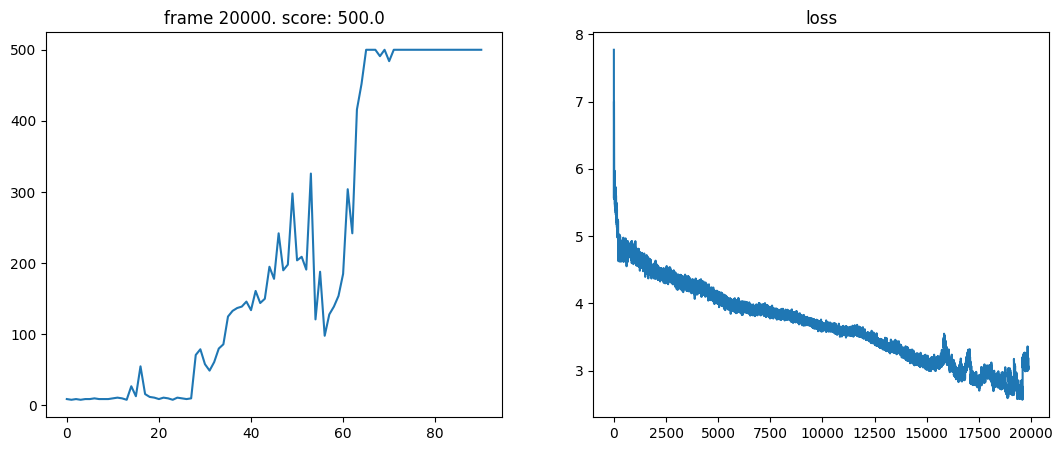

In [10]:
agent.train(num_frames) 

# Test

Run the trained agent (1 episode).

In [11]:
video_folder="videos/rainbow"
agent.test(video_folder=video_folder)

score:  500.0


## Show the trained agent

In [12]:
latest_file = show_latest_video(video_folder=video_folder)
print("Played:", latest_file)

Played: videos/rainbow/rl-video-episode-0.mp4
